# Importing Libraries

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [96]:
df = pd.read_csv(r'D:\Task2\bank-marketing-uci\bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Data  Exploration

In [97]:
df.shape

(4521, 17)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [99]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [100]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

print_unique_col_values(df)

job: ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
marital: ['married' 'single' 'divorced']
education: ['primary' 'secondary' 'tertiary' 'unknown']
default: ['no' 'yes']
housing: ['no' 'yes']
loan: ['no' 'yes']
contact: ['cellular' 'unknown' 'telephone']
month: ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
poutcome: ['unknown' 'failure' 'other' 'success']
y: ['no' 'yes']


In [101]:
for col in df:
    print(f'{col}: {df[col].unique()}')

age: [30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]
job: ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
marital: ['married' 'single' 'divorced']
education: ['primary' 'secondary' 'tertiary' 'unknown']
default: ['no' 'yes']
balance: [ 1787  4789  1350 ...  -333 -3313  1137]
housing: ['no' 'yes']
loan: ['no' 'yes']
contact: ['cellular' 'unknown' 'telephone']
day: [19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 18 12 21 26 22  2  4 15  8
 28  9  1 10 31 25 24]
month: ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
duration: [  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148   96  140  109  125  169  182  247  119
  149   74  897   81   40  958  354  150   97 

# Data Cleaning

In [102]:
df1 = df[df['balance'] > 0]
df1.shape

(3798, 17)

In [103]:
df1['balance'].unique()

array([1787, 4789, 1350, ..., 4196, 1080, 1137], dtype=int64)

In [104]:
df1.drop(columns=['day','month'],axis='columns',inplace=True)

C:\Users\Shefa\AppData\Local\Temp\ipykernel_14896\3623717646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['day','month'],axis='columns',inplace=True)


In [105]:
df2 = df1[~df1['job'].str.contains("unknown", na=False)]
df2.shape

(3763, 15)

In [106]:
df3 = df2[~df2['education'].str.contains("unknown", na=False)]
df3.shape

(3616, 15)

In [107]:
df4 = df3[~df3['contact'].str.contains("unknown", na=False)]
df4.shape

(2596, 15)

In [108]:
df4['poutcome'].replace("unknown", "other", inplace=True)
df4.shape

C:\Users\Shefa\AppData\Local\Temp\ipykernel_14896\1720176334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['poutcome'].replace("unknown", "other", inplace=True)


(2596, 15)

In [109]:
print_unique_col_values(df4)

job: ['unemployed' 'services' 'management' 'self-employed' 'technician'
 'admin.' 'student' 'blue-collar' 'entrepreneur' 'housemaid' 'retired']
marital: ['married' 'single' 'divorced']
education: ['primary' 'secondary' 'tertiary']
default: ['no' 'yes']
housing: ['no' 'yes']
loan: ['no' 'yes']
contact: ['cellular' 'telephone']
poutcome: ['other' 'failure' 'success']
y: ['no' 'yes']


# Univariate Analysis

In [110]:
#Frequency of 'subscribed'
df4['y'].value_counts()

no     2208
yes     388
Name: y, dtype: int64

<AxesSubplot: xlabel='y', ylabel='count'>

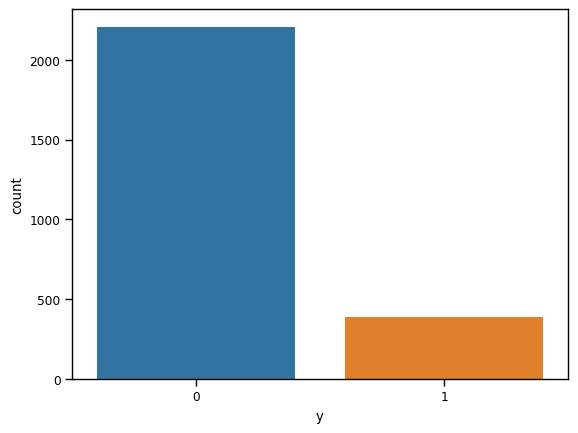

In [154]:
# Plotting the 'subscribed' frequency
sns.countplot(data=df4, x='y')

From the above analysis we can see that only 388 people out of 2,596 have subscribed which is roughly 15%.

<AxesSubplot: >

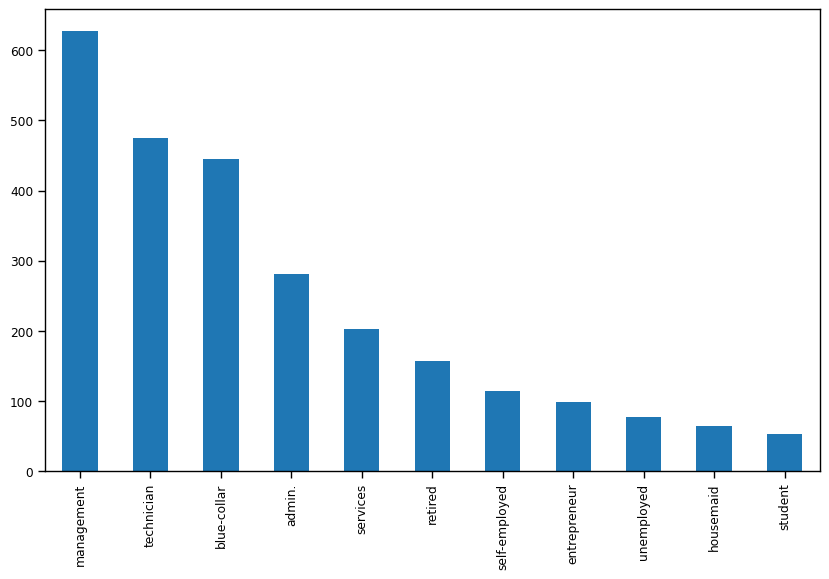

In [112]:
# Plotting the job frequency table
sns.set_context('paper')
df4['job'].value_counts().plot(kind='bar', figsize=(10,6))

We can see that most of the clients beloned to Management job and students are least as they don't make term deposits in general.

<AxesSubplot: xlabel='marital', ylabel='count'>

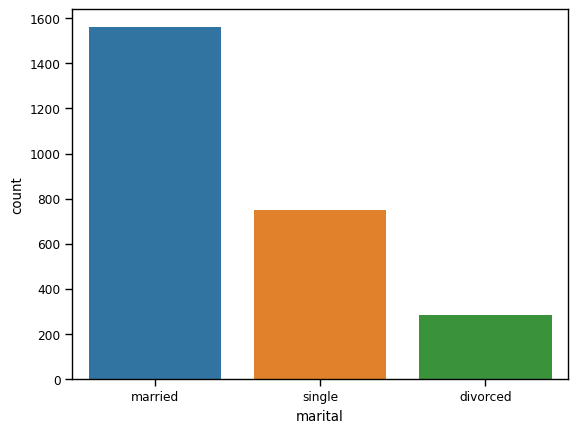

In [113]:
# Plotting the marital frequency table
sns.countplot(data=df4, x='marital')

We can see from above visualization that most of the clients are Married.

C:\Users\Shefa\AppData\Local\Temp\ipykernel_14896\2663416122.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['age'])


<AxesSubplot: xlabel='age', ylabel='Density'>

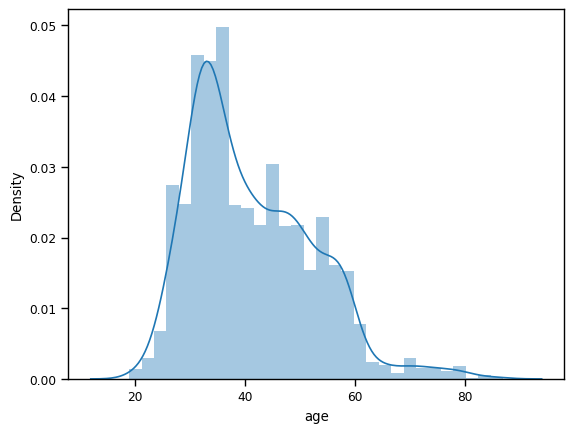

In [114]:
#Analysing with age variable
sns.distplot(df4['age'])

We can infer that most of the clients fall in the age group between 20-60.

# Bivariate Analysis

In [115]:
#job vs subscribed
job=pd.crosstab(df4['job'],df4['y'])
job

y,no,yes
job,,
admin.,240,41
blue-collar,405,40
entrepreneur,87,12
housemaid,55,9
management,519,108
retired,116,41
self-employed,100,15
services,173,30
student,35,18


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'unemployed'),
  Text(1, 0, 'services'),
  Text(2, 0, 'management'),
  Text(3, 0, 'self-employed'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'admin.'),
  Text(6, 0, 'student'),
  Text(7, 0, 'blue-collar'),
  Text(8, 0, 'entrepreneur'),
  Text(9, 0, 'housemaid'),
  Text(10, 0, 'retired')])

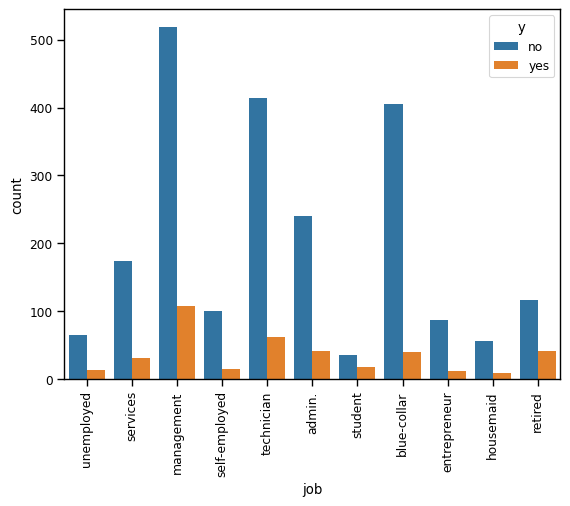

In [116]:
#sns.countplot(x='job', hue='y', data=df4, dodge=False)
sns.countplot(data=df4, x='job', hue='y')
plt.xticks(rotation=90)

In [117]:
#Marital status vs subscribed
pd.crosstab(df4['marital'], df4['y'])

y,no,yes
marital,,
divorced,231,53
married,1352,210
single,625,125


<AxesSubplot: xlabel='marital', ylabel='count'>

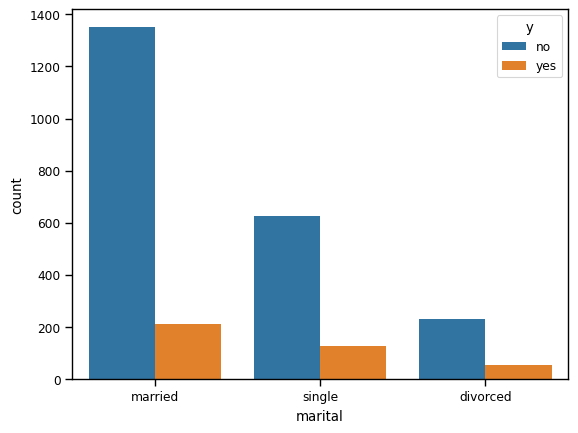

In [118]:
sns.countplot(data=df4, x='marital', hue='y')

In [119]:
#default vs subscription
pd.crosstab(df4['default'], df4['y'])

y,no,yes
default,,
no,2192,385
yes,16,3


<AxesSubplot: xlabel='default', ylabel='count'>

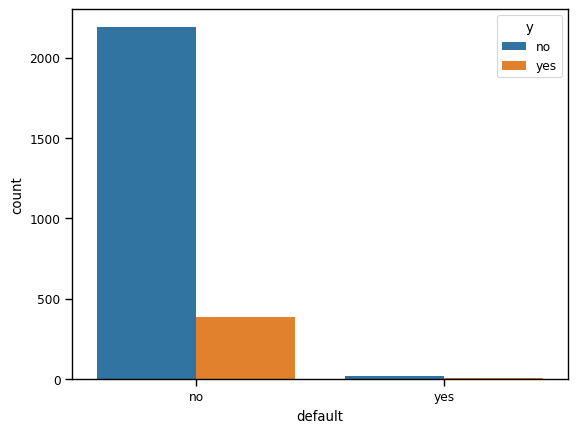

In [120]:
sns.countplot(data=df4, x='default', hue='y')

In [121]:
#Correlation matrix
cm = df4.corr()
cm

C:\Users\Shefa\AppData\Local\Temp\ipykernel_14896\2570003095.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = df4.corr()


,age,balance,duration,campaign,pdays,previous
age,1.000000,0.096801,0.007491,0.012298,-0.031051,-0.008492
balance,0.096801,1.000000,-0.000126,-0.011818,-0.009470,0.016240
duration,0.007491,-0.000126,1.000000,-0.056262,-0.000982,0.001647
campaign,0.012298,-0.011818,-0.056262,1.000000,-0.108009,-0.073198
pdays,-0.031051,-0.009470,-0.000982,-0.108009,1.000000,0.540679
previous,-0.008492,0.016240,0.001647,-0.073198,0.540679,1.000000


<AxesSubplot: >

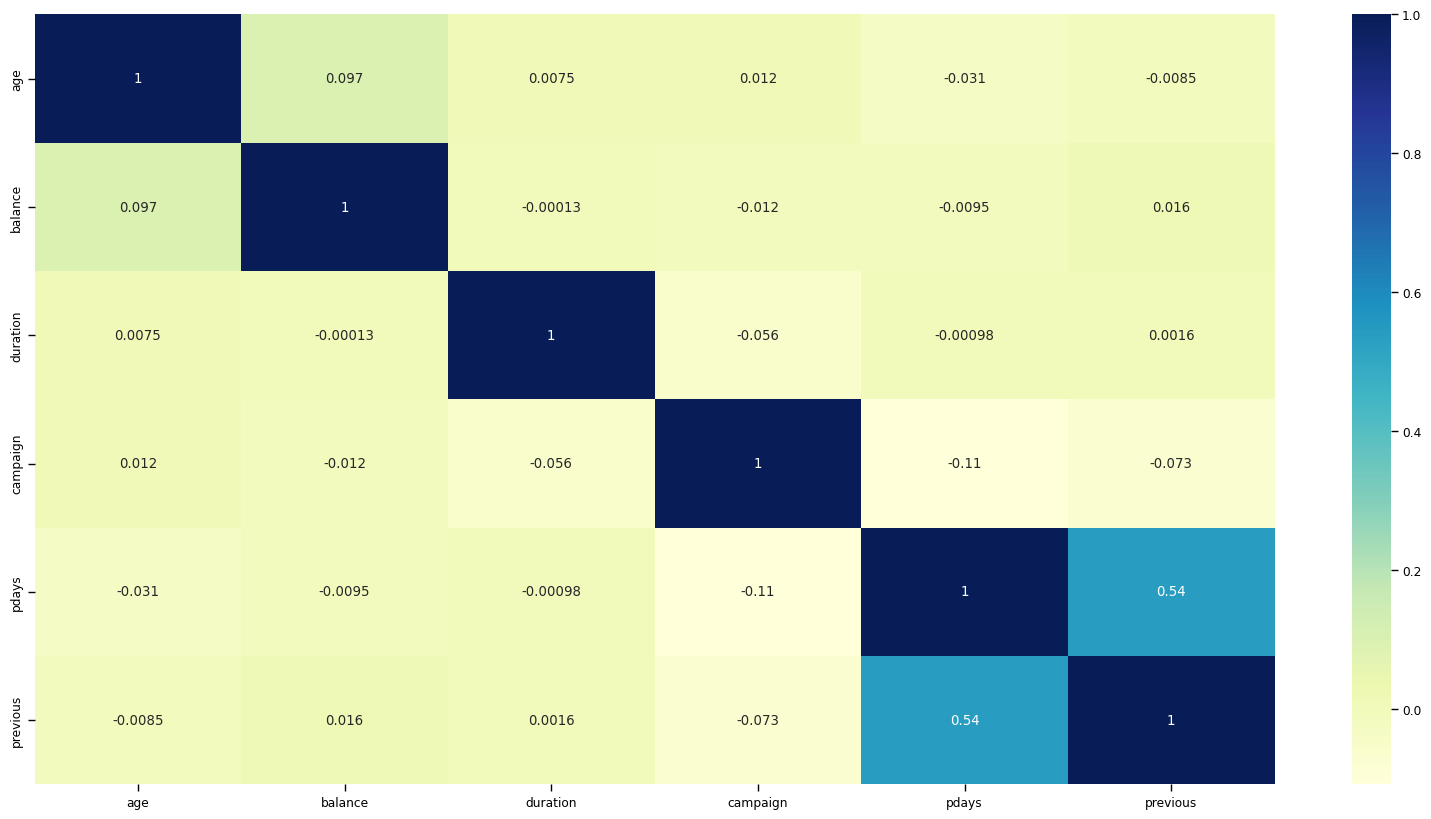

In [122]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(cm, annot=True, cmap='YlGnBu')

We can infer that duration of the call is highly correlated with the target variable. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

# Data Transformation

In [123]:
yes_no_columns = ['default','housing','loan','y']
for col in yes_no_columns:
    df4[col].replace({'yes':1,'no':0},inplace=True)

C:\Users\Shefa\AppData\Local\Temp\ipykernel_14896\3761923913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4[col].replace({'yes':1,'no':0},inplace=True)


In [124]:
df4.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,79,1,-1,0,other,0
1,33,services,married,secondary,0,4789,1,1,cellular,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,185,1,330,1,failure,0
5,35,management,single,tertiary,0,747,0,0,cellular,141,2,176,3,failure,0
6,36,self-employed,married,tertiary,0,307,1,0,cellular,341,1,330,2,other,0


In [125]:
df5 = pd.get_dummies(data=df4, columns=['job','marital','education','contact','poutcome'])
df5.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'contact_cellular', 'contact_telephone',
       'poutcome_failure', 'poutcome_other', 'poutcome_success'],
      dtype='object')

In [126]:
df5.sample(5)

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
2639,50,0,1240,0,0,474,2,-1,0,0,...,1,0,0,0,1,1,0,0,1,0
34,49,0,1235,0,0,354,3,-1,0,1,...,1,0,0,0,1,1,0,0,1,0
314,25,0,760,1,0,223,3,89,2,1,...,0,1,0,0,1,1,0,1,0,0
3123,47,0,405,0,1,994,2,-1,0,1,...,1,0,0,1,0,1,0,0,1,0
1005,41,0,10758,1,0,288,1,-1,0,0,...,1,0,0,0,1,1,0,0,1,0


In [127]:
for col in df5:
    print(f'{col}: {df5[col].unique()}')

age: [30 33 35 36 39 43 20 31 40 56 37 42 44 26 41 53 68 59 32 49 78 52 55 38
 34 48 57 63 51 29 54 50 27 60 28 21 58 25 22 45 77 46 23 75 24 47 70 65
 62 66 61 19 81 64 80 67 71 72 69 83 79 73 86 74 76 87 84]
default: [0 1]
balance: [1787 4789 1350 ...  288 1137 1136]
housing: [0 1]
loan: [0 1]
duration: [  79  220  185  141  341  151  113  328  261   89  189  239  114  148
  140  125  169  182  149   74  897   81   40  958  354   97  132  765
  106  365  205   11   59 1740   98  441  272  159  295  323  227  134
  223  155  130  164   67  367   87  701  204  652   63  150  398  224
   60  279  201  165  231  233  473  736  553  345   65  259  280  243
  258    7  317   76  170  386   83   69  588 1877   32  176  161  187
   54  190  168  194  102  213   77  324   84  380  676   80  549  412
  253  135   18  147   14   61  377   96  152  543  240  471  285  301
  273  768 1337  403  196  115   17   10  198  654   71  256  834  111
  186  210    9  195  123  145  124  483  690  144  22

# Data Normalization

In [128]:
cols_to_scale = ['age','balance','duration','pdays','campaign','previous']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df5[cols_to_scale] = scaler.fit_transform(df5[cols_to_scale])

In [129]:
for col in df5:
    print(f'{col}: {df5[col].unique()}')

age: [0.16176471 0.20588235 0.23529412 0.25       0.29411765 0.35294118
 0.01470588 0.17647059 0.30882353 0.54411765 0.26470588 0.33823529
 0.36764706 0.10294118 0.32352941 0.5        0.72058824 0.58823529
 0.19117647 0.44117647 0.86764706 0.48529412 0.52941176 0.27941176
 0.22058824 0.42647059 0.55882353 0.64705882 0.47058824 0.14705882
 0.51470588 0.45588235 0.11764706 0.60294118 0.13235294 0.02941176
 0.57352941 0.08823529 0.04411765 0.38235294 0.85294118 0.39705882
 0.05882353 0.82352941 0.07352941 0.41176471 0.75       0.67647059
 0.63235294 0.69117647 0.61764706 0.         0.91176471 0.66176471
 0.89705882 0.70588235 0.76470588 0.77941176 0.73529412 0.94117647
 0.88235294 0.79411765 0.98529412 0.80882353 0.83823529 1.
 0.95588235]
default: [0 1]
balance: [0.02508885 0.06725947 0.01895009 ... 0.00403163 0.01595797 0.01594392]
housing: [0 1]
loan: [0 1]
duration: [3.76398779e-02 1.09359105e-01 9.15564598e-02 6.91759919e-02
 1.70905392e-01 7.42624619e-02 5.49338759e-02 1.64292981e-0

In [130]:
df5.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0.161765,0,0.025089,0,0,0.037640,0.000000,0.000000,0.00,0,...,1,0,1,0,0,1,0,0,1,0
1,0.205882,0,0.067259,1,1,0.109359,0.000000,0.389908,0.16,0,...,1,0,0,1,0,1,0,1,0,0
2,0.235294,0,0.018950,1,0,0.091556,0.000000,0.379587,0.04,0,...,0,1,0,0,1,1,0,1,0,0
5,0.235294,0,0.010479,0,0,0.069176,0.020408,0.202982,0.12,0,...,0,1,0,0,1,1,0,1,0,0
6,0.250000,0,0.004299,1,0,0.170905,0.000000,0.379587,0.08,0,...,1,0,0,0,1,1,0,0,1,0


# Splitting Dataset

In [131]:
x = df5.drop('y',axis='columns')
y = df5['y']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [132]:
x_train.shape

(2076, 31)

In [133]:
x_test.shape

(520, 31)

# ANN Model Building 

In [134]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(31, input_shape=(31,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
65/65 [==============================] - 1s 4ms/step - loss: 0.5915 - accuracy: 0.7216
Epoch 2/100
65/65 [==============================] - 0s 4ms/step - loss: 0.4162 - accuracy: 0.8502
Epoch 3/100
65/65 [==============================] - 0s 4ms/step - loss: 0.3949 - accuracy: 0.8502
Epoch 4/100
65/65 [==============================] - 0s 4ms/step - loss: 0.3772 - accuracy: 0.8560
Epoch 5/100
65/65 [==============================] - 0s 4ms/step - loss: 0.3597 - accuracy: 0.8651
Epoch 6/100
65/65 [==============================] - 0s 4ms/step - loss: 0.3456 - accuracy: 0.8671
Epoch 7/100
65/65 [==============================] - 0s 4ms/step - loss: 0.3342 - accuracy: 0.8690
Epoch 8/100
65/65 [==============================] - 0s 4ms/step - loss: 0.3241 - accuracy: 0.8690
Epoch 9/100
65/65 [==============================] - 0s 4ms/step - loss: 0.3152 - accuracy: 0.8704
Epoch 10/100
65/65 [==============================] - 0s 4ms/step - loss: 0.3084 - accuracy: 0.8733
Epoch 11/

# Model Testing

In [135]:
yp = model.predict(x_test)
yp

17/17 [==============================] - 0s 3ms/step


array([[5.01767755e-01],
       [8.32142457e-02],
       [3.38082373e-01],
       [3.67232382e-01],
       [3.10404808e-03],
       [3.63638431e-01],
       [3.95955378e-03],
       [5.74383065e-02],
       [1.23567358e-01],
       [1.48517475e-01],
       [2.43728414e-01],
       [4.45021726e-02],
       [7.91605055e-01],
       [4.19129521e-01],
       [1.02553800e-01],
       [1.68926492e-01],
       [6.67132497e-01],
       [6.27114549e-02],
       [3.07325870e-01],
       [5.18789422e-03],
       [6.52363449e-02],
       [7.74907239e-04],
       [4.81134504e-01],
       [2.48093195e-02],
       [5.06195366e-01],
       [1.73678703e-03],
       [8.09446752e-01],
       [1.04149640e-01],
       [2.25908272e-02],
       [4.54471773e-03],
       [8.97734798e-03],
       [5.72669378e-04],
       [1.06426836e-04],
       [4.15414833e-02],
       [7.61990529e-03],
       [6.10328950e-02],
       [5.45106418e-02],
       [1.07934484e-02],
       [1.70228984e-02],
       [8.98110747e-01],


In [136]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [137]:
y_pred[:10]

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [138]:
y_test[:10]

C:\Users\Shefa\AppData\Local\Temp\ipykernel_14896\2588316582.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:10]


300     0
364     0
3348    0
468     0
2098    0
3281    0
1693    1
2224    0
2205    0
3022    0
Name: y, dtype: int64

# Model Evaluation

In [139]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       443
           1       0.47      0.32      0.38        77

    accuracy                           0.85       520
   macro avg       0.68      0.63      0.65       520
weighted avg       0.83      0.85      0.83       520



Text(94.91666666666667, 0.5, 'Truth')

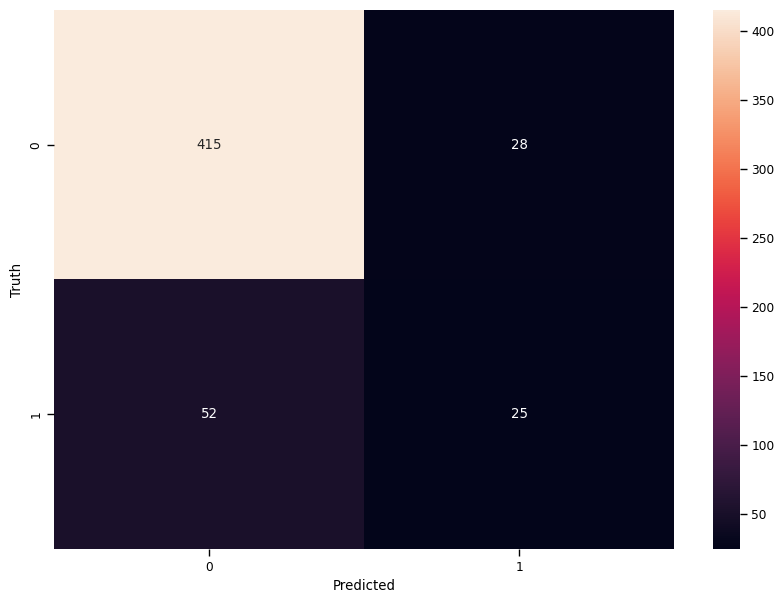

In [140]:
import seaborn as sn
com = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(com, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')